## Data Cleaning ##

In [1]:
import pandas as pd
import numpy as np

#load dataset
file_path = "/Users/samanthamoon/Desktop/DSAN 5900/SummerStudentAdmissions2.csv"
df = pd.read_csv(file_path)

In [2]:
for col in df.columns:
    unique_values = df[col].dropna().unique()
    print(f"'{col}':\n{unique_values}\n")

'Decision':
['Admit' 'Banana' 'Decline' 'Waitlist']

'State':
['California' 'Florida' 'Colorado' 'Utah' 'Oregon' 'Virginia' 'virginia'
 'mississippi' 'New York' 'Alabama' 'Georgia' 'Vermont']

'GPA':
[3.9  3.8  3.6  3.92 3.88 3.7  3.93 3.69 3.78 3.5  3.65 3.75 6.   3.54
 3.66 3.55 3.59 3.77 3.87 3.56 3.79 3.71 3.74 3.61 3.84 2.81 2.34 2.9
 3.33 3.37 3.   3.1  3.22 3.44 2.98 2.77 3.18 3.11 3.32 3.01 2.91 2.85
 3.21 3.4  3.45 3.41 3.53 3.42 3.39 3.52 3.49 3.43 3.29 3.58 3.57 3.51
 3.47 3.46]

'WorkExp':
[  6.7   1.4   2.3   0.9   1.2   1.5   4.7   1.7   0.8   3.2   3.7   3.8
   2.7   0.7   1.1   8.7   2.8   2.2   0.    1.    1.9   1.3   9.2   1.6
   6.2   4.6 100.    3.5   1.8   7.2   2.    3.3   3.4]

'TestScore':
[962. 969. 970. 967. 961. 966. 968. 799. 965. 963. 956. 899. 867. 789.
 800. 765. 896. 764. 754. 769. 766. 768. 751. 767. 757. 763. 758. 753.
 762. 859. 869. 866. 868. 855. 865. 864. 853. 862.]

'WritingScore':
[100  97  98  95  94  93  91  99   1  90  11  88  89  87  78  77  

In [3]:
#removing invalid decision values
valid_decisions = {"Admit", "Decline", "Waitlist"}
df = df[df["Decision"].isin(valid_decisions)]

In [4]:
#standardize state names
df["State"] = df["State"].str.strip().str.title()

In [5]:
#convert to numeric
df["GPA"] = pd.to_numeric(df["GPA"], errors="coerce")
df["TestScore"] = pd.to_numeric(df["TestScore"], errors="coerce")
df["WritingScore"] = pd.to_numeric(df["WritingScore"], errors="coerce")
df["WorkExp"] = pd.to_numeric(df["WorkExp"], errors="coerce")
df["VolunteerLevel"] = pd.to_numeric(df["VolunteerLevel"], errors="coerce")
df["Gender"] = pd.to_numeric(df["Gender"], errors="coerce")

In [6]:
#check for any missing vals
print(df.isna().sum())


Decision          0
State             0
GPA               1
WorkExp           0
TestScore         0
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64


In [7]:
print(min(df['WorkExp']))

0.0


In [8]:
#ensure realistic values
df = df[(df["GPA"] >= 0) & (df["GPA"] <= 4.0)]  # GPA should be between 0 and 4.0
df = df[(df["TestScore"] >= 400) & (df["TestScore"] <= 1600)]  # Test score range
df = df[(df["WritingScore"] >= 0) & (df["WritingScore"] <= 100)]  # Writing score range
df = df[(df["WorkExp"] >= 0)]  # Work experience should not be negative
df = df[(df["VolunteerLevel"] >= 0) & (df["VolunteerLevel"] <= 5)]  # Volunteer level should be between 0 and 5
df = df[df["Gender"].isin([0, 1])]  # Ensure Gender values are either 0 or 1

In [9]:
selected_cols = ["GPA", "TestScore", "WritingScore", "WorkExp"] 

def remove_outliers(df, columns):
    df_filtered = df.copy()
    for col in columns:
        Q1 = df_filtered[col].quantile(0.25) 
        Q3 = df_filtered[col].quantile(0.75) 
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR 
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    return df_filtered

df= remove_outliers(df, selected_cols)

In [10]:
print(df)

    Decision       State   GPA  WorkExp  TestScore  WritingScore  Gender  \
1      Admit     Florida  3.80      1.4      969.0            97     1.0   
3      Admit    Colorado  3.60      0.9      969.0            97     0.0   
6      Admit  California  3.88      1.5      967.0            95     1.0   
7      Admit  California  3.70      1.2      969.0            94     1.0   
9      Admit  California  3.70      1.4      966.0            94     1.0   
..       ...         ...   ...      ...        ...           ...     ...   
83  Waitlist     Vermont  3.53      3.3      862.0            85     1.0   
84  Waitlist     Florida  3.52      0.7      868.0            81     0.0   
85  Waitlist     Florida  3.51      3.4      865.0            88     1.0   
86  Waitlist  California  3.47      2.2      867.0            77     1.0   
87  Waitlist     Florida  3.46      1.9      869.0            89     1.0   

    VolunteerLevel  
1                4  
3                2  
6                5  
7  

In [11]:
df.to_csv("/Users/samanthamoon/Desktop/DSAN 5900/cleaned_data.csv", index=False)

## Data Vis ##

In [12]:
file_path = "/Users/samanthamoon/Desktop/DSAN 5900/cleaned_data.csv"
clean_df = pd.read_csv(file_path)

/var/folders/3r/q12c_hq501qbrgcdyypjhpsm0000gn/T/ipykernel_1139/1114344248.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rates = df.groupby(factor)["Decision"].apply(lambda x: (x == "Admit").mean()) * 100
/var/folders/3r/q12c_hq501qbrgcdyypjhpsm0000gn/T/ipykernel_1139/1114344248.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rates = df.groupby(factor)["Decision"].apply(lambda x: (x == "Admit").mean()) * 100
/var/folders/3r/q12c_hq501qbrgcdyypjhpsm0000gn/T/ipykernel_1139/1114344248.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True i

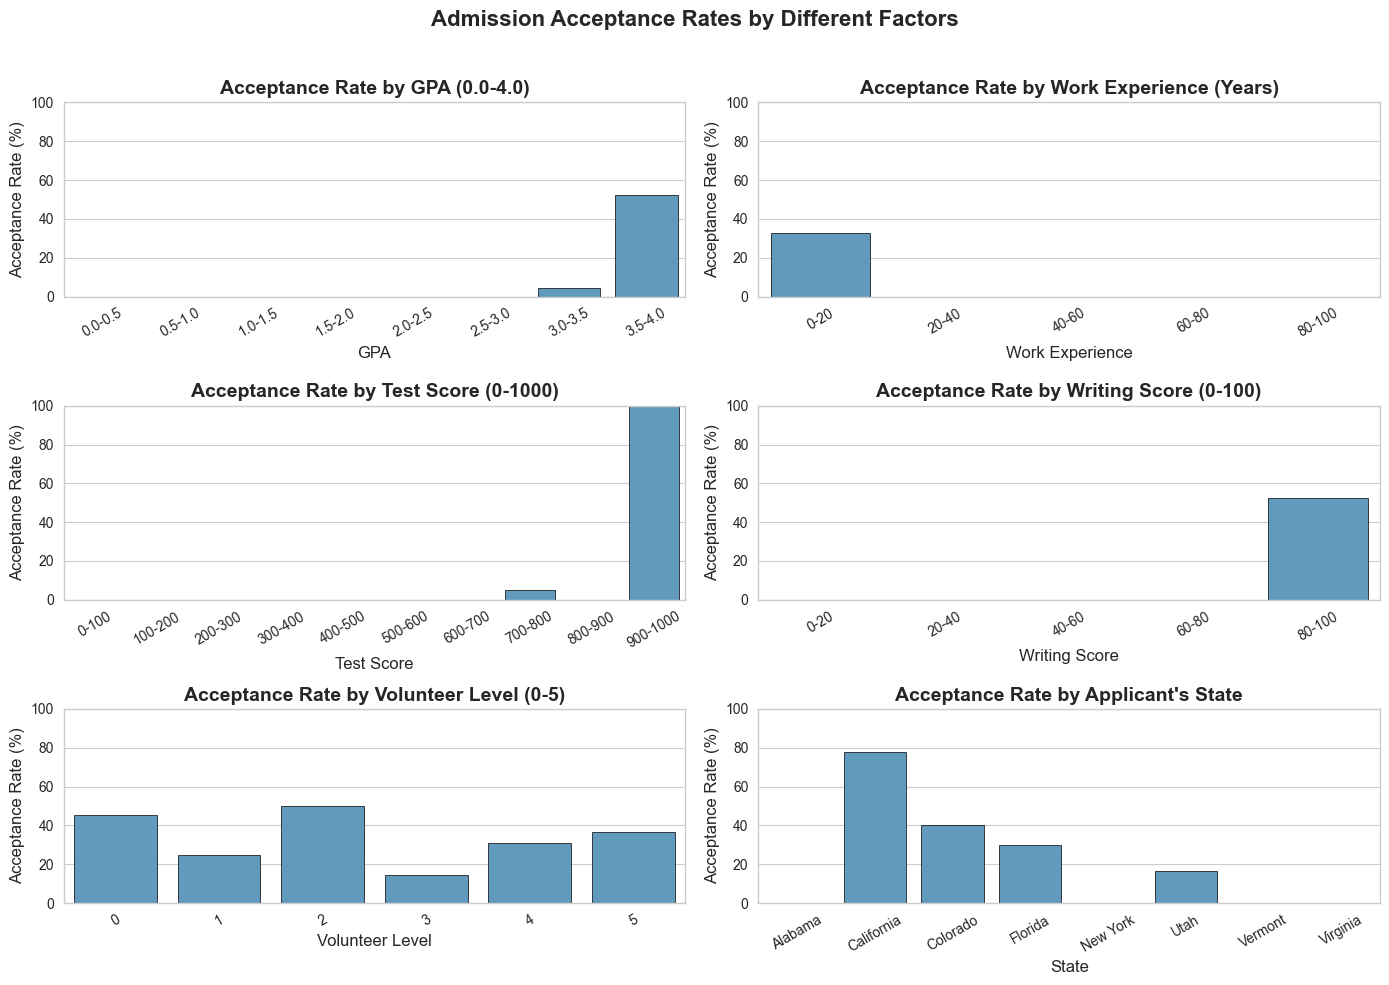

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

palette = sns.color_palette("Blues_r")
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle("Admission Acceptance Rates by Different Factors", fontsize=16, fontweight="bold")

for i, (factor, label) in enumerate(factor_labels.items()):
    row, col = divmod(i, 2) 

    if factor in df.columns:
        acceptance_rates = df.groupby(factor)["Decision"].apply(lambda x: (x == "Admit").mean()) * 100
        sns.barplot(
            x=acceptance_rates.index, y=acceptance_rates.values, ax=axes[row, col],
            color=palette[2], edgecolor="black" 
        )

        axes[row, col].set_title(f"Acceptance Rate by {label}", fontsize=14, fontweight="bold")
        axes[row, col].set_ylabel("Acceptance Rate (%)", fontsize=12)
        axes[row, col].set_xlabel(custom_x_axis.get(factor, factor), fontsize=12)
        axes[row, col].set_ylim(0, 100) 

        axes[row, col].tick_params(axis='x', rotation=30, labelsize=10)
        axes[row, col].tick_params(axis='y', labelsize=10)
    else:
        axes[row, col].set_visible(False) 

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [42]:
#inspect data  to check vis
sub_df = df[(df["WritingScore"] >= 40) & (df["WritingScore"] <= 60)]

print(sub_df)

   Decision    State   GPA  WorkExp  TestScore  WritingScore  Gender  \
38  Decline  Florida  3.74      1.3      800.0            56     1.0   
39  Decline  Florida  3.61      1.3      789.0            56     1.0   
42  Decline  Florida  2.81      9.2      764.0            56     0.0   

    VolunteerLevel  GPA_Bin TestScore_Bin WritingScore_Bin WorkExp_Bin  
38               4  3.5-4.0       700-800            40-60        0-20  
39               5  3.5-4.0       700-800            40-60        0-20  
42               2  2.5-3.0       700-800            40-60        0-20  
